# Assignment 7

**Wale Agboola**

**Import libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import os
import fnmatch

**Display the current workin directory using os.getcwd()**

In [2]:
cwd = os.getcwd()

print("Current working directory:", cwd)

Current working directory: /Users/wagboola/Desktop/Grad School Stuff/Data 690/Assignment_7/Raw Data Files


**Os library has a method call listdir which generates a list of files in a directory/folder.Use this method to assign the contents (list of file names) of the data folder to a variable and display it.**

In [3]:
dirs = os.listdir(cwd)

for file in dirs:
    print(file)

MERGED2011_12_PP.csv
MERGED1999_00_PP.csv
MERGED2006_07_PP.csv
MERGED2014_15_PP.csv
.DS_Store
Most-Recent-Cohorts-All-Data-Elements.csv
MERGED2003_04_PP.csv
Untitled.ipynb
MERGED1996_97_PP.csv
FieldOfStudyData1516_1617_PP.csv
Most-Recent-Cohorts-Field-of-Study.csv
MERGED2012_13_PP.csv
MERGED2005_06_PP.csv
MERGED2009_10_PP.csv
Assignment_7.ipynb
FieldOfStudyData1617_1718_PP.csv
MERGED2018_19_PP.csv
MERGED2017_18_PP.csv
Crosswalks.zip
MERGED2000_01_PP.csv
MERGED2001_02_PP.csv
MERGED2016_17_PP.csv
MERGED1997_98_PP.csv
MERGED1998_99_PP.csv
data.yaml
MERGED2004_05_PP.csv
.ipynb_checkpoints
MERGED2002_03_PP.csv
MERGED2015_16_PP.csv
MERGED2013_14_PP.csv
MERGED2007_08_PP.csv
MERGED2008_09_PP.csv
MERGED2010_11_PP.csv
FieldOfStudyData1415_1516_PP.csv


**Write code to remove the unwanted files from the list vsriable**

In [4]:
file_name = []

for file in dirs:
    if file.startswith('MERGED'):
        file_name.append(file)
        
file_name

['MERGED2011_12_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2010_11_PP.csv']

**Loop throuugh list of fiiles and only load the necessary six columns**

In [6]:
list_of_dataframes = []


for filename in file_name:
    df = pd.read_csv(filename, usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
    Year = filename[6:10]
    df['Year'] = Year
    list_of_dataframes.append(df)

merged_df = pd.concat(list_of_dataframes)

merged_df['Year'] = merged_df['Year'].astype(int)

merged_df['TUITIONFEE_IN'] = merged_df['TUITIONFEE_IN'].astype(float)

**Explore the new dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)**

In [7]:
merged_df.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
0,100654,Alabama A & M University,AL,5.0,0.5010,6828.0,2011
1,100663,University of Alabama at Birmingham,AL,5.0,0.7223,6264.0,2011
2,100690,Amridge University,AL,5.0,NaN,8720.0,2011
3,100706,University of Alabama in Huntsville,AL,5.0,0.6368,8094.0,2011
4,100724,Alabama State University,AL,5.0,0.5080,8082.0,2011


In [8]:
merged_df.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
7465,45896402,Strayer University-Charleston Campus,SC,5.0,NaN,14085.0,2010
7466,45897301,Strayer University-Irving,TX,6.0,NaN,14085.0,2010
7467,45897302,Strayer University-Katy,TX,6.0,NaN,14085.0,2010
7468,45897303,Strayer University-Northwest Houston,TX,6.0,NaN,14085.0,2010
7469,45897304,Strayer University-Plano,TX,6.0,NaN,14085.0,2010


In [9]:
merged_df.sample()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
2055,168740,Andrews University,MI,3.0,0.6037,14570.0,2003


In [10]:
merged_df.isnull()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
7465,False,False,False,False,True,False,False
7466,False,False,False,False,True,False,False
7467,False,False,False,False,True,False,False
7468,False,False,False,False,True,False,False


In [11]:
merged_df.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN,Year
count,1.633310e+05,163330.000000,44912.000000,79195.000000,163331.000000
mean,9.432395e+05,4.554693,0.692951,11665.636871,2007.249481
std,4.571721e+06,2.189217,0.217058,9986.003542,6.608266
min,1.006360e+05,0.000000,0.000000,0.000000,1996.000000
25%,1.633380e+05,3.000000,0.555075,3776.000000,2002.000000
50%,2.127800e+05,5.000000,0.717500,9285.000000,2008.000000
75%,4.075680e+05,6.000000,0.857100,16148.000000,2013.000000
max,4.914640e+07,9.000000,1.000000,74787.000000,2018.000000


**Filter/query the dataframe to retrieve only rows that belong to UMBC. Save the UMNC data to a new data frame. using a new variable**

In [12]:
UMBC_df = merged_df[merged_df['INSTNM']=='University of Maryland-Baltimore County']

**Explore this UMBC dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)**

In [13]:
UMBC_df.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
1694,163268,University of Maryland-Baltimore County,MD,2.0,0.6081,9467.0,2011
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1799,163268,University of Maryland-Baltimore County,MD,2.0,0.7153,8622.0,2006
1610,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003


In [14]:
UMBC_df.columns

Index(['UNITID', 'INSTNM', 'STABBR', 'REGION', 'ADM_RATE', 'TUITIONFEE_IN',
       'Year'],
      dtype='object')

In [15]:
UMBC_df.info

<bound method DataFrame.info of       UNITID                                   INSTNM STABBR  REGION  \
1694  163268  University of Maryland-Baltimore County     MD     2.0   
1955  163268  University of Maryland-Baltimore County     MD     2.0   
1799  163268  University of Maryland-Baltimore County     MD     2.0   
1610  163268  University of Maryland-Baltimore County     MD     2.0   
1873  163268  University of Maryland-Baltimore County     MD     2.0   
2151  163268  University of Maryland-Baltimore County     MD     2.0   
1660  163268  University of Maryland-Baltimore County     MD     2.0   
1819  163268  University of Maryland-Baltimore County     MD     2.0   
1745  163268  University of Maryland-Baltimore County     MD     2.0   
1415  163268  University of Maryland-Baltimore County     MD     2.0   
1478  163268  University of Maryland-Baltimore County     MD     2.0   
1926  163268  University of Maryland-Baltimore County     MD     2.0   
1915  163268  University of Mary

In [16]:
UMBC_df.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
1555,163268,University of Maryland-Baltimore County,MD,2.0,0.5942,11006.0,2015
1629,163268,University of Maryland-Baltimore County,MD,2.0,0.6315,10068.0,2013
1779,163268,University of Maryland-Baltimore County,MD,2.0,0.6895,8708.0,2007
1767,163268,University of Maryland-Baltimore County,MD,2.0,0.7174,8780.0,2008
1710,163268,University of Maryland-Baltimore County,MD,2.0,0.6589,9171.0,2010


In [17]:
UMBC_df.sample()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
1767,163268,University of Maryland-Baltimore County,MD,2.0,0.7174,8780.0,2008


In [18]:
UMBC_df.isnull()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
1694,False,False,False,False,False,False,False
1955,False,False,False,False,True,True,False
1799,False,False,False,False,False,False,False
1610,False,False,False,False,False,False,False
1873,False,False,False,False,False,False,False
2151,False,False,False,False,True,True,False
1660,False,False,False,False,False,False,False
1819,False,False,False,False,False,False,False
1745,False,False,False,False,False,False,False
1415,False,False,False,False,False,False,False


In [19]:
UMBC_df.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN,Year
count,23.0,23.0,18.000000,19.000000,23.00000
mean,163268.0,2.0,0.640694,9004.842105,2007.00000
std,0.0,0.0,0.052728,1825.795421,6.78233
min,163268.0,2.0,0.568300,5490.000000,1996.00000
25%,163268.0,2.0,0.597600,8270.000000,2001.50000
50%,163268.0,2.0,0.632100,8872.000000,2007.00000
75%,163268.0,2.0,0.689375,10226.000000,2012.50000
max,163268.0,2.0,0.717400,11778.000000,2018.00000


In [20]:
UMBC_df2 = UMBC_df.sort_values('Year', ascending =True)

**Plot UMBC's in-state tution overtime from 1996 to 2019 using Line Chart**

In [23]:
fig = px.line(UMBC_df2, x="Year", y="TUITIONFEE_IN", color='INSTNM', title = 'UMBC In-State Tuition (Line)')
fig.show()

**Plot UMBC's in-state tution overtime from 1996 to 2019 using Bar Chart**

In [24]:
fig2 = px.bar(data_frame=UMBC_df2, 
             x="INSTNM", y="TUITIONFEE_IN",  
             color="INSTNM",animation_frame = 'Year' 
             )
fig2.show()

**First convert the TUITIONFEE_IN column to a Python List**

In [25]:
Tuition_list2 = UMBC_df2['TUITIONFEE_IN'].tolist()

Tuition_list2

[nan,
 nan,
 nan,
 nan,
 5490.0,
 5910.0,
 6362.0,
 7388.0,
 8020.0,
 8520.0,
 8622.0,
 8708.0,
 8780.0,
 8872.0,
 9171.0,
 9467.0,
 9764.0,
 10068.0,
 10384.0,
 11006.0,
 11264.0,
 11518.0,
 11778.0]

**Loop through the list and calculate the % change each year over the prior year**

In [26]:
def percentageChange(start, current):
    return (current - start/abs(start))*100.0

PC_list = []

for cost in Tuition_list2:
    pc = percentageChange(Tuition_list2[4], cost)
    PC_list.append(pc)
    
PC_list

[nan,
 nan,
 nan,
 nan,
 548900.0,
 590900.0,
 636100.0,
 738700.0,
 801900.0,
 851900.0,
 862100.0,
 870700.0,
 877900.0,
 887100.0,
 917000.0,
 946600.0,
 976300.0,
 1006700.0,
 1038300.0,
 1100500.0,
 1126300.0,
 1151700.0,
 1177700.0]

**Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")**

In [27]:
UMBC_df2["PCT_CHANGE"] = PC_list

UMBC_df2.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year,PCT_CHANGE
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996,NaN
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997,NaN
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998,NaN
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999,NaN
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000,548900.0


**Finaly, we can make the plot tuition growth rate year over year - bar first, then line chart**

In [28]:
fig3 = px.bar(data_frame=UMBC_df2, 
             x="INSTNM", y="PCT_CHANGE",  
             color="INSTNM",animation_frame = 'Year' 
             )
fig3.show()

In [29]:
fig4 = px.line(UMBC_df2, x="Year", y="PCT_CHANGE", color='INSTNM', title = 'UMBC PC Change')
fig4.show()

**Let's create a function which can be reused for any college.**

In [ ]:
def percentageChange(start, current):
    return (current - start/abs(start))*100.0

**Let's just look at JHU. Filter/query the dataframe to retrieve only rows that belong to JHU**

In [30]:
JHU_df = merged_df[merged_df['INSTNM']=='Johns Hopkins University']

JHU_df2 = JHU_df.sort_values('Year', ascending =True)

JHU_df2.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year
2139,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996
2039,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997
1973,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998
1946,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999
1917,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000


**Plot JHU's in-state tuition overtime from 1996 to 2019. Let's plot bar and line chart together**

In [31]:
fig5 = px.bar(data_frame=JHU_df2, 
             x="INSTNM", y="TUITIONFEE_IN",  
             color="INSTNM",animation_frame = 'Year' 
             )
fig5.show()

In [32]:
fig6 = px.line(JHU_df2, x="Year", y="TUITIONFEE_IN", color='INSTNM', title = 'Tuition overtime')
fig6.show()

**Let's calculate the JHU tuition percentge growth using the function defined earlier**

In [33]:
JHU_TUI_list = JHU_df2['TUITIONFEE_IN'].tolist()

JHU_TUI_list

[nan,
 nan,
 nan,
 nan,
 24930.0,
 26210.0,
 27390.0,
 28730.0,
 30140.0,
 31620.0,
 33900.0,
 35900.0,
 37700.0,
 39150.0,
 40680.0,
 42280.0,
 43390.0,
 45470.0,
 47060.0,
 48710.0,
 50410.0,
 52170.0,
 53740.0]

**Add the list of percentage changes to the dataframe as a new column ("PCT_CHANGE")**

In [34]:
PC_list2 = []

for cost in JHU_TUI_list:
    pc = percentageChange(JHU_TUI_list[4], cost)
    PC_list2.append(pc)
    
PC_list2

[nan,
 nan,
 nan,
 nan,
 2492900.0,
 2620900.0,
 2738900.0,
 2872900.0,
 3013900.0,
 3161900.0,
 3389900.0,
 3589900.0,
 3769900.0,
 3914900.0,
 4067900.0,
 4227900.0,
 4338900.0,
 4546900.0,
 4705900.0,
 4870900.0,
 5040900.0,
 5216900.0,
 5373900.0]

**Make a bar plot of the JHU percentage changes tuitions over time**

In [35]:
JHU_df2["PCT_CHANGE"] = PC_list2

JHU_df2.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,Year,PCT_CHANGE
2139,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996,NaN
2039,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997,NaN
1973,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998,NaN
1946,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999,NaN
1917,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000,2492900.0


In [36]:
fig7 = px.bar(data_frame=JHU_df2, 
             x="INSTNM", y="PCT_CHANGE",  
             color="INSTNM",animation_frame = 'Year' 
             )
fig7.show()

**We need to combine the two datasets using the common key of YEAR**

**First make a umbc2 dataframe with only two columns needed. WE don't need other columns.**

In [37]:
UMBC_min_df = UMBC_df2[['PCT_CHANGE', 'Year']]

UMBC_min_df.head()

,PCT_CHANGE,Year
2151,NaN,1996
2049,NaN,1997
1982,NaN,1998
1955,NaN,1999
1926,548900.0,2000


In [38]:
UMBC_min_df.rename(columns={"PCT_CHANGE" : "UMBC_PCT"}, inplace =True)

/Users/wagboola/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
UMBC_min_df.head()

,UMBC_PCT,Year
2151,NaN,1996
2049,NaN,1997
1982,NaN,1998
1955,NaN,1999
1926,548900.0,2000


**Then make a jhu2 dataframe with only two columns needed. WE don't need other columns.**

In [40]:
JHU_min_df = JHU_df2[['PCT_CHANGE', 'Year']]

JHU_min_df.head()

,PCT_CHANGE,Year
2139,NaN,1996
2039,NaN,1997
1973,NaN,1998
1946,NaN,1999
1917,2492900.0,2000


In [41]:
JHU_min_df.rename(columns={"PCT_CHANGE" : "JHU_PCT"}, inplace=True)

JHU_min_df.head()

,JHU_PCT,Year
2139,NaN,1996
2039,NaN,1997
1973,NaN,1998
1946,NaN,1999
1917,2492900.0,2000


**Now, merge the two data frames and display the new dataframe**

In [42]:
New_DF = UMBC_min_df.merge(JHU_min_df, on='Year')

New_DF.head()

,UMBC_PCT,Year,JHU_PCT
0,NaN,1996,NaN
1,NaN,1997,NaN
2,NaN,1998,NaN
3,NaN,1999,NaN
4,548900.0,2000,2492900.0


**Plot UMBC and JHU separately on the same plot. However, this does not work since the bars overlap.**

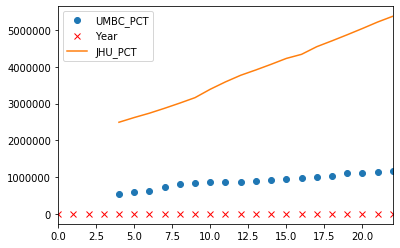

In [43]:
New_DF.plot(style=['o','rx'])

Pandas plot just to see how the data has turned out.

**Plot them together using y=["UMBC_PCT","JHU_PCT"] option of bar and line plot**

In [44]:
fig9 = px.bar(data_frame=New_DF, x=["UMBC_PCT","JHU_PCT"])
fig9.show()

In [47]:
fig10 = px.line(data_frame=New_DF, y=["JHU_PCT","UMBC_PCT"])
fig10.show()

In [48]:
fig11 = px.scatter(New_DF, x="UMBC_PCT", y="JHU_PCT", color="Year")
fig11.show()

**Observations**

The plots don't seem to be bringing any data for John Hopkins University, previouslsy when I've plotted multiple lines r bars on the same graph the factor that diffferentiated the lines were in the same column but now those factors are in seperate columns which is giving a strange result. I experimented by ploting a scatter plot and I got a more believable result. And with the result I can cleary see a correlation between both schools percentage changes.